
# Importing The Packages

In [1]:
import scipy.stats
import numpy as np
# Since newer versions of scipy deprecated scipy.stats.itemfreq which is required by some libraries here,
# this monkeypath should override its use in those libraries
# credit to https://stackoverflow.com/a/74266763/
def monkeypath_itemfreq(sampler_indices):
   return zip(*np.unique(sampler_indices, return_counts=True))

scipy.stats.itemfreq=monkeypath_itemfreq

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline
# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics.pairwise import euclidean_distances  
from lightgbm import LGBMClassifier
from sklearn.metrics import pairwise_distances
import copy
from IPython.display import clear_output
from eli5.lime import TextExplainer
import warnings
from eli5.lime.samplers import MaskingTextSampler
from re import sub
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#plotly.offline.init_notebook_mode (connected = True)
import eli5
from eli5.lime import TextExplainer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from PIL import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import random
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
2022-12-13 13:10:49.490248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 13:10:49.598666: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off 


# Importing the data

In [3]:
# The dataset may contain unescaped quotes in quoted text, so we will tell pandas to ignore them
data = pd.read_csv('./mind-news-dataset/news.tsv/news.tsv',header=None,sep='\t',engine='python',error_bad_lines=False)

Skipping line 164: '	' expected after '"'
Skipping line 188: '	' expected after '"'
Skipping line 214: '	' expected after '"'
Skipping line 441: '	' expected after '"'
Skipping line 472: '	' expected after '"'
Skipping line 504: '	' expected after '"'
Skipping line 594: '	' expected after '"'
Skipping line 669: '	' expected after '"'
Skipping line 711: '	' expected after '"'
Skipping line 962: '	' expected after '"'
Skipping line 1067: '	' expected after '"'
Skipping line 1176: '	' expected after '"'
Skipping line 1248: '	' expected after '"'
Skipping line 1299: '	' expected after '"'
Skipping line 1349: '	' expected after '"'
Skipping line 1434: '	' expected after '"'
Skipping line 1668: '	' expected after '"'
Skipping line 2239: '	' expected after '"'
Skipping line 2244: '	' expected after '"'
Skipping line 2276: '	' expected after '"'
Skipping line 2305: '	' expected after '"'
Skipping line 2324: '	' expected after '"'
Skipping line 2351: '	' expected after '"'
Skipping line 2390: '

In [4]:
# Assign names to columns
data.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]


# Dataset preview

In [5]:
data.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."



# Selecting our columns

In [6]:
data = data[['News ID', 'Category','SubCategory','Title','Abstract']]

In [7]:
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."



# Visualizing the data


## Category and Subcategory distribution in data

In [8]:
c=data[['Category','SubCategory']].value_counts()

In [9]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [10]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [11]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')

From this we can clearly see that the most of the news was on the Category of news with subcategory newsus followed by sports with football news


## WordCloud For Sports News

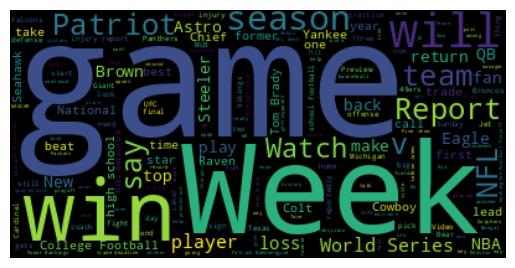

In [12]:
text=' '
for i in data[data['Category']=='sports']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()



## Histogram For Title Length

In [13]:
t=[]
for i in data['Title']:
    t.append(len(i))
px.histogram(t,color=data['Category'])

Well most of the titles are in the range of 50 to 100 words :) So if you are gonna write a news article keep the title in 50 - 100 words :)


# Data Preprocessing

## Checking and removing all the duplicate values

In [14]:
print('Number of articles before processing :',len(data))
data.drop_duplicates(subset=['Title'],inplace=True)
print('Number of articles after processing :',len(data))

Number of articles before processing : 42048
Number of articles after processing : 41455


## Checking for NaN values

In [15]:
data.isna().sum()

News ID           0
Category          0
SubCategory       0
Title             0
Abstract       2006
dtype: int64

<AxesSubplot: >

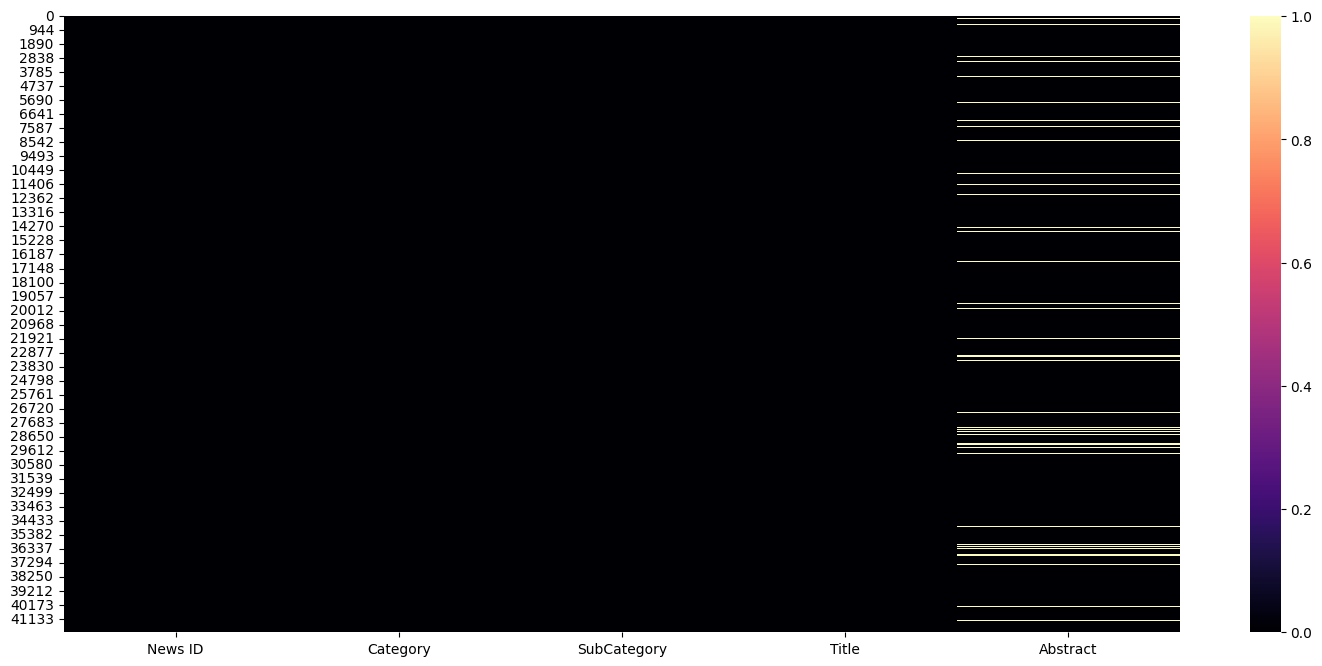

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=True, cmap='magma')


In [17]:
data.dropna(inplace=True)


## Getting Titles with more than 4 words

In [18]:
print('the number of articles before processing :',len(data))
data=data[data['Title'].apply((lambda x: len(x.split())>=4))]
print('The number of articles after processing :',len(data))

the number of articles before processing : 39449
The number of articles after processing : 39359


In [19]:
# Create a backup
df2=data.copy()

# Text Preprocessing

In [20]:
# This function is to remove stopwords from a particular column and to tokenize it
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [21]:
# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a
  
  


In [22]:
    # Removing Stop words from Title Column
rem_stopwords_tokenize(data,'Title')

In [23]:
# Lemmatizing the Title column
lemmatize_all(data,'Title')

In [24]:
# Making a copy of data to use in the future
data4=data.copy()

## Converting Back To String

In [25]:
def convert_to_string(data,name):
    t=data[name].values
    p=[]
    for i in t:
        listToStr = ' '.join(map(str, i))
        p.append(listToStr)
    data[name]=p


In [26]:
convert_to_string(data,'Title')

# Using Bag of Words

In [27]:
headline_vectorizer = CountVectorizer()

### Bagging-based Model using Euclidean Distance

In [28]:
def Bagging_based_euclidean_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features = headline_vectorizer.fit_transform(cate_data['Title'].values)
    dist = euclidean_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean similarity': dist[indices].ravel()})
    print("Bag of words with Euclidean similarity")
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',df2['Title'][indices[0]])
    print("\n","="*30,"Recommended News : ","="*30)
    return df.iloc[1:,:]

In [29]:
#name=input('News Title For Recommendation :')
name = "The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By"
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=Bagging_based_euclidean_model(ind, 100)
dd.head(10)

Bag of words with Euclidean similarity
============================== News Article Name ==============================
News Headline :  The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By

 ============================== Recommended News :  ==============================


,headline,Category,Abstract,Euclidean similarity
1,Prince Charles is Getting Into Fashion,lifestyle,Prince Charles is now getting into fashion wit...,3.316625
2,Prince Louis' Royal Baby Album!,lifestyle,Duchess Kate and Prince William welcomed their...,3.605551
3,Prince Charles Is Getting Into the Fashion Bus...,lifestyle,The Prince's Foundation is partnering with the...,3.605551
4,Prince George's Royal Life in Photos,lifestyle,Photos of the future king of England who is ...,3.605551
5,The world's most luxurious kitchens,lifestyle,A compilation of some the most lavish kitchens...,3.741657
6,The cutest photos of royal children and their ...,lifestyle,See all the cute photos of royal children with...,3.741657
7,A Look Back at Prince Charles and Camilla's Re...,lifestyle,In honor of the third season of The Crown.,3.741657
8,Prince Harry and Meghan Markle's Sweetest Moments,lifestyle,See the Duke and Duchess of Sussex's cutest sn...,3.741657
9,See All the Best Photos of Prince Charles's Tr...,lifestyle,The Prince of Wales kicked off his 10th offici...,3.741657
10,Look of the Day,lifestyle,Reese Witherspoon attended the premiere of the...,3.741657


In [30]:
# Stores all average distances of all models
ave_list = []

In [31]:
# Appends to the list the euclidean similarity of the bagging based model
ave_distance = dd["Euclidean similarity"].mean()
ave_list.append(ave_distance)
print(ave_distance)

3.91647206322654


### Bagging-based Model using Cosine Similarity

In [32]:
def Bagging_based_cosine_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features = headline_vectorizer.fit_transform(cate_data['Title'].values)
    dist = cosine_similarity(headline_features,headline_features[row_index2])
    indices = np.argsort(dist.ravel())[::num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Cosine similarity': dist[indices].ravel()})
    print("Bag of words with cosine similarity")
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',df2['Title'][indices[0]])
    print("\n","="*30,"Recommended News : ","="*30)
    return df.iloc[1:,:]

In [33]:
#name=input('News Title For Recommendation :')
name = "The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By"
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=Bagging_based_cosine_model(ind, 100)
dd.head(10)

Bag of words with cosine similarity
============================== News Article Name ==============================
News Headline :  23 Ways You're Wasting Money at Costco

 ============================== Recommended News :  ==============================


,headline,Category,Abstract,Cosine similarity
1,66 Cool Tech Gifts Anyone Would Be Thrilled to...,lifestyle,"Let's face it: everyone wants the newest, cool...",0.0
2,Are you a 'snowplow parent'?,lifestyle,"KANSAS CITY, Mo. -- It's the latest buzz phras...",0.0
3,Central Iowans spend 5 months on Halloween dis...,lifestyle,A Des Moines family took Halloween decorations...,0.0
4,"After being pushed close to extinction, this h...",lifestyle,A key population of humpback whales is in reco...,0.0
5,12 Ways Grandparents Waste Money on Their Gran...,lifestyle,AARP recently found that U.S. grandparents col...,0.0
6,20 Ways You're Not Prepping Your Home for Wint...,lifestyle,"Is your home ready for the snow, ice, and fros...",0.0
7,"That Little Hole at the Top of Your Sink, Expl...",lifestyle,Have you ever wondered about that hole near th...,0.0
8,How Many Hours of Sleep You Need Based on Your...,lifestyle,"You may be a night owl or an early riser, but ...",0.0
9,27 Last-Minute Halloween Costumes You Can Do W...,lifestyle,Consider these the easiest ways to win the pri...,0.0
10,5 Reasons Why Marie Kondo's Method Is All Wron...,lifestyle,"Sorry, Marie Kondo.",0.0


In [34]:
# Appends to the list the cosine similarity of the bagging based model
ave_distance = dd["Cosine similarity"].mean()
ave_list.append(ave_distance)
print(ave_distance)

0.018728404667747712


I think we got some good recommendations here  :)

The thing about using this model is that it gives real less importance to less frequent words but sometimes those are the words that could make some real difference .

# Using TF-IDF Method

### TF-IDF based Model using Euclidean Distance

In [35]:
tfidf_headline_vectorizer = TfidfVectorizer(min_df = 0)
# TF-IDF uses L2 normalization by default

In [36]:
def TFIDF_based_euclidean_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features   = tfidf_headline_vectorizer.fit_transform(cate_data['Title'].values)
    dist = euclidean_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean similarity': dist[indices].ravel()})
    print("TF-IDF with Euclidean similarity")
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',df2['Title'][indices[0]])
    print("\n","="*26,"Recommended News Using TF-IDF: ","="*30)
    return df.iloc[1:,:]

In [37]:
#name=input('News Title For Recommendation :')
name = "Stars who got fired from major projects"
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=TFIDF_based_euclidean_model(ind, 100)
dd.head(10)

TF-IDF with Euclidean similarity
============================== News Article Name ==============================
News Headline :  Stars who got fired from major projects

 ========================== Recommended News Using TF-IDF:  ==============================


,headline,Category,Abstract,Euclidean similarity
1,31 Photos of Vintage Celebrities on Their Wedd...,entertainment,"Marilyn Monroe, Audrey Hepburn, Elvis Presley,...",1.232295
2,You Won't Believe Where These Celebs Worked Be...,entertainment,They had to start somewhere!,1.244933
3,World Series 2019: Celebs Cheering for the Was...,entertainment,D.C. politicians and Beltway journalists like ...,1.306346
4,"Elton John, Brad Pitt, and More Celebs Who Cha...",entertainment,"Yep, ""Brad"" is not Pitt's actual first name.",1.306474
5,Can You Guess the Surprising Celebs These Star...,entertainment,Did you know Kate Middleton has a Hollywood co...,1.310880
6,Jessica Simpson and 25 More Celebs Who Got Ric...,entertainment,See which stars made very lucrative career swi...,1.314062
7,Long-term celebrity couples who won't get married,entertainment,These committed celeb couples have opted not t...,1.322298
8,40 Celebrities and Their Vintage Doppelgangers,entertainment,You won't believe these stars aren't related.,1.324444
9,Celebs and their pets in 2019,entertainment,"See Natalie Portman, Selena Gomez, Sean Penn a...",1.327823
10,"Xbox Scarlett won't sacrifice power, studio ac...",entertainment,Quite the surprises in this one. What you need...,1.331750


In [38]:
# Appends to the list the euclidean similarity of the TF-IDF based model
ave_distance = dd["Euclidean similarity"].mean()
ave_list.append(ave_distance)
print(ave_distance)

1.380527333920406


### TF-IDF based Model using Cosine Similarity

In [39]:
def TFIDF_based_cosine_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features = tfidf_headline_vectorizer.fit_transform(cate_data['Title'].values)
    dist = cosine_similarity(headline_features,headline_features[row_index2])
    indices = np.argsort(dist.ravel())[::-1]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Cosine similarity': dist[indices].ravel()})
    print("TF-IDF with cosine similarity")
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',df2['Title'][indices[0]])
    print("\n","="*26,"Recommended News Using TF-IDF: ","="*30)
    return df.iloc[1:,:]

In [40]:
#name=input('News Title For Recommendation :')
name = "Stars who got fired from major projects"
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=TFIDF_based_cosine_model(ind, 100)
dd.head(10)

TF-IDF with cosine similarity
============================== News Article Name ==============================
News Headline :  Stars who got fired from major projects

 ========================== Recommended News Using TF-IDF:  ==============================


,headline,Category,Abstract,Cosine similarity
1,31 Photos of Vintage Celebrities on Their Wedd...,entertainment,"Marilyn Monroe, Audrey Hepburn, Elvis Presley,...",0.240725
2,You Won't Believe Where These Celebs Worked Be...,entertainment,They had to start somewhere!,0.225071
3,World Series 2019: Celebs Cheering for the Was...,entertainment,D.C. politicians and Beltway journalists like ...,0.146730
4,"Elton John, Brad Pitt, and More Celebs Who Cha...",entertainment,"Yep, ""Brad"" is not Pitt's actual first name.",0.146563
5,Can You Guess the Surprising Celebs These Star...,entertainment,Did you know Kate Middleton has a Hollywood co...,0.140797
6,Jessica Simpson and 25 More Celebs Who Got Ric...,entertainment,See which stars made very lucrative career swi...,0.136621
7,Long-term celebrity couples who won't get married,entertainment,These committed celeb couples have opted not t...,0.125763
8,40 Celebrities and Their Vintage Doppelgangers,entertainment,You won't believe these stars aren't related.,0.122924
9,Celebs and their pets in 2019,entertainment,"See Natalie Portman, Selena Gomez, Sean Penn a...",0.118443
10,"Xbox Scarlett won't sacrifice power, studio ac...",entertainment,Quite the surprises in this one. What you need...,0.113221


In [41]:
# Appends to the list the cosine similarity of the TF-IDF based model
ave_distance = dd["Cosine similarity"].mean()
ave_list.append(ave_distance)
print(ave_distance)

0.009037194488306132


WEll the recommendations are different and looks better :) 

Let's see if we can make it much better :)

**Why TFIDF is good ??**

* It’s fast and works well when documents are large and/or have lots of overlap.
* It looks for exact matches, so at the very least you should use a lemmatizer to take care of the plurals.
* When comparing short documents with limited-term variety — such as search queries — there is a risk that you will miss semantic relationships where there isn’t an exact word match.

# Comparison of Distances

In [42]:
df_data = {'Approach': ['Bag of Words - Euclidean', 'Bag of Words - Cosine', 'TF-IDF - Euclidean', 'TF-IDF - Cosine'], 'Average Distance': ave_list}

output = pd.DataFrame(df_data)
output = output.sort_values(by="Average Distance", ascending=True)
print(output)

                   Approach  Average Distance
3           TF-IDF - Cosine          0.009037
1     Bag of Words - Cosine          0.018728
2        TF-IDF - Euclidean          1.380527
0  Bag of Words - Euclidean          3.916472


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b75b4c8-2bcc-4772-a4ef-c8b10255c91f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>